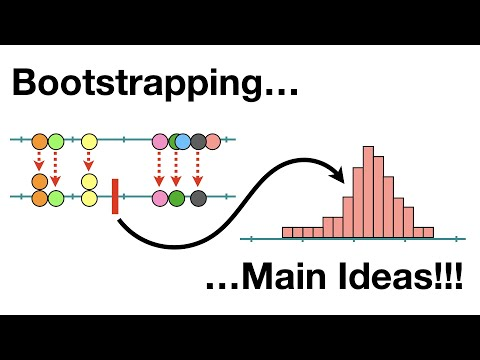

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)



Q1
Standard deviation measures the variability or spread of individual data points in a single dataset and the standard error of the mean measures the variability between sample means repeatedly taken from the same population.

Q2
We first compute the sample mean and calculate the standard error of the mean. Then we apply the critical value 1.96 to calculate the confidence interval (Sample mean +- (1.96 x standard error of the mean). The interval yields the lower and upper bounds of the confidence interval, which will cover approximately 95% of the bootstrapped sample means.


Q3
We could do this as follows:

Generate bootstrap sample by sampling from the original data with replacemen. Calculate the mean for each bootstrap sample. Sort the bootsrapped means, and then find the 2.5th percentile and 97.5th percentile of the bootstrapped means. The range between these percentiles presents the 95% confidence interval since it covers 95% of the bootstrapped means.

In [3]:
#Q4

import numpy as np

# Sample data representing annual incomes (in thousands of dollars)
data = [45, 60, 53, 70, 48, 65, 82, 52, 44, 58, 61, 77, 90, 102, 110, 95, 64, 57, 73, 84, 
        100, 46, 55, 62, 89, 78, 85, 93, 68, 49, 71, 54, 56, 72, 83, 88, 92, 103, 75, 99]

# Number of bootstrap samples
n_bootstraps = 10000

# Container for storing bootstrap sample means (can be modified for other parameters)
bootstrapped_means = []

# Perform bootstrap sampling
for _ in range(n_bootstraps):
    # Resample the data with replacement to create a bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate the mean of the bootstrap sample (change this to other stats like median)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval using the 2.5th and 97.5th percentiles
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

# Output the 95% confidence interval for the population mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound:.2f}, {upper_bound:.2f}]")

# --- Modification Example ---
# To calculate a 95% CI for the median instead of the mean:
# bootstrapped_medians = [np.median(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstraps)]
# lower_bound = np.quantile(bootstrapped_medians, 0.025)
# upper_bound = np.quantile(bootstrapped_medians, 0.975)
# print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Bootstrap Confidence Interval for the Mean: [67.10, 78.38]


Q5

Population parameter is the true value we want to estimate. It could be the population mean or population mean. The population parameter is fixed but unknown because we rarely have the access to the entire population. The sample statistic is a known value calculated from the sample data, such as the sample mean or sample median. We use the statistics as points to estimate the population parameter. This is using available data to infer meaningful information for a population.

Q6

What is the process of bootstrapping?

Bootstrapping is like trying to estimate something about a population when you don't have all the data. You only have a sample, so to get the most/more out of what you have, you randomly resample your data with replacement. Replacement just means that when you pick a value, you put it back before picking the next one so some values can show up more than once in each resample.

You repeat this process a lot of times, say 10000 times, and for each resample, you calculate the statistic you care about, such as the mean. In the end you get a distribution of all those statistics from your resamples to figue out a range that likely includes the true population value. We call this range the confidence interval.

What is the main purpose of bootstrapping?

The main reason for bootstrapping is to estimate something about a population, for example, the mean, when you don't have access to the entire population data. In fact, it is almost always the case in the real world that you have a small sample and not the entire population. Bootstrapping helps us get a sense of how much uncertainty there is in the estimate. It is especially useful since we don't have to assume a specific distribution out of the blue and can stillg et a pretty good idea of the possible range of the population value.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Let's say we think the average of a population is 50. We also have a sample of size n from the population. We want to know if our guess is reasonable or way off. 

To do this, we take a few steps. First, we take our sample and resample it a bunch of time with replacement. Each time, we calculate the mean of the new resample and collect all those means and put them in a box safely. Now we have a distribution of resampled means. Finally, we take a look at the confidence interval of this distribution. It usually is the 95% confidence interval, meaning it contains the central 95% of our bootstrapped means.

Finally we make conclusions. If our hypothesized guess which I remember was 50, right?. If this guess falls within that confidence interval, then it's probably a plausible guess for the population mean. If however, it is outside that interval, our guess is likely off. The actual population mean is something else than 50. 



Q7

In hypothesis testing, the null hypothesis suggests "no effect". This means, for example, that a drug has no effect, that the true average effect is zero. If the confidence interval for the drug's effect includes zero, we can say that zero is a plausible value, so we fail to reject the null hypothesis. Even if the sample mean isn't zero, the data isn't strong enough to rule out no effect. 

However, we can reject the null hypothesis and conclude for example, that the drug has some effect when the confidence interval excludes zero. This means that zero is not a plausible value in our confidence interval, and we conclude something had an effect.

Q8

Problem introduction

In this analysis, we investigate if AliTech's vaccine has a measurable impact on the health of the participants. The null hypothesis in this context means that the vaccine has no effect on the health scores in our data, meaning that the change in health scores is due to some other random factor and not due to the vaccine. We test this hypothesis by analyzing the difference between the initial and final health scores using statistical methods


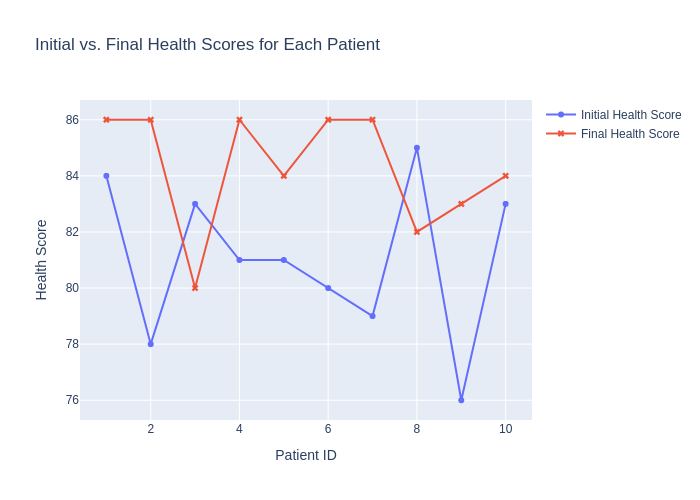

In [5]:
import plotly.graph_objects as go
import pandas as pd

# Load the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Create line plot
fig = go.Figure()

# Initial Health Scores
fig.add_trace(go.Scatter(x=df['PatientID'], y=df['InitialHealthScore'], 
                         mode='lines+markers', name='Initial Health Score', marker=dict(symbol='circle')))

# Final Health Scores
fig.add_trace(go.Scatter(x=df['PatientID'], y=df['FinalHealthScore'], 
                         mode='lines+markers', name='Final Health Score', marker=dict(symbol='x')))

# Add title and labels
fig.update_layout(title="Initial vs. Final Health Scores for Each Patient",
                  xaxis_title="Patient ID", yaxis_title="Health Score")

# Show the plot
fig.show(renderer="png")

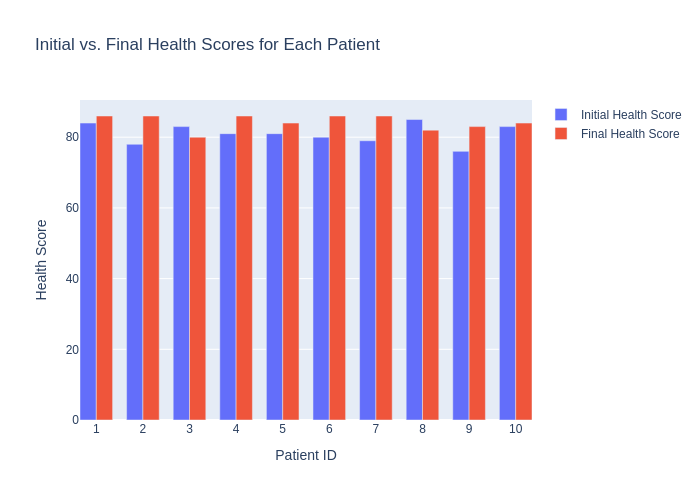

In [4]:
import plotly.graph_objects as go
import numpy as np

# Create the x-axis positions for the bars
x = np.arange(len(df['PatientID']))
width = 0.35  # Width of the bars

# Create bar plot
fig = go.Figure()

# Initial Health Scores
fig.add_trace(go.Bar(x=x - width/2, y=df['InitialHealthScore'], width=0.35, name='Initial Health Score'))

# Final Health Scores
fig.add_trace(go.Bar(x=x + width/2, y=df['FinalHealthScore'], width=0.35, name='Final Health Score'))

# Update layout
fig.update_layout(title="Initial vs. Final Health Scores for Each Patient",
                  xaxis=dict(tickvals=x, ticktext=df['PatientID']),
                  xaxis_title="Patient ID", yaxis_title="Health Score", barmode='group')

# Show the plot
fig.show(renderer="png")

Q8

Methodology

We will use bootstrapping to assess whether the change in health scores before and after the vaccine is statistically significant. We repeatedly sample from the observed data to simulate the distribution of possible outcomes. 

Difference Calculation: We calculate the difference between initial and final health scores for each patient. 

Bootstrap sampling

We generate bootstrap samples of these differences and calculate the mean difference for each sample. 

Statistical inference

By comparing the observed mean difference to the distribution of bootstrap sample means, we can estimate confidence intervals and assess whether the observed change is statistically significant. If the observed mean difference lies outside the expected range of the bootstrap distribution, in this case, based on a 95% confidence interval, we can reject the null hypothesis that the vaccine has no effect.

In [10]:
#Q8
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Calculate the difference in health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Observed mean difference
observed_mean_diff = df['HealthScoreDiff'].mean()

# Bootstrapping function
def bootstrap_means(data, n_bootstrap=10000):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.array(boot_means)

# Bootstrap sampling
bootstrap_means_diff = bootstrap_means(df['HealthScoreDiff'])

# Calculate 95% confidence interval
conf_interval = np.percentile(bootstrap_means_diff, [2.5, 97.5])

# Print results
print(f"Observed Mean Difference: {observed_mean_diff}")
print(f"95% Confidence Interval: {conf_interval}")

Observed Mean Difference: 3.3
95% Confidence Interval: [0.9 5.6]


Q8

Findings and Discussion


Conclusion regarding a Null Hypothesis of "no effect"

The observed mean (3.3) difference shows the average improvement in health scores after patients taking the vaccine. It indicates that on average, patients experienced an improvement of 3.3 points in their health scores after taking the vaccine.

The 95% confidence interval is the interval from 0.9 to 5.6. It does not contain 0. We can therefore reject the null hypothesis. The fact that the entire interval is positive further supports the conclusion that the vaccine has a positive effect on patient's health

Further considerations 

While the results provide strong evidence that the vaccine imporves health scores, it is important to consider a few other factors:

Sample size: With only 10 patients, the sample size is relatively small. Larger studies would be beneficial to confirm the validity of the findings.


Q9

I read the text book as well as used ChatGPT for this assignment


CHATGPT SUMMARY

Throughout our conversation, we addressed various aspects of your bootstrapping and statistical analysis project, alongside reviewing some earlier questions on hypothesis testing and confidence intervals. We discussed methods of analysis, the roles of null hypotheses, bootstrapping techniques, and how to interpret results. Additionally, we explored improvements in data visualization using Plotly for your vaccine data.
1. Introduction to Hypothesis Testing:

We first discussed hypothesis testing, focusing on the concept of the null hypothesis of "no effect." I explained why a confidence interval that overlaps zero suggests we fail to reject the null hypothesis, even if the observed sample mean is not zero. We also touched on what it means to reject the null hypothesis—specifically, when the confidence interval does not include zero.
2. Introduction to Bootstrapping:

We explored bootstrapping as a resampling technique to estimate the distribution of a sample statistic when the population parameter is unknown. The goal of bootstrapping was to help estimate the uncertainty of the sample mean, providing a way to construct confidence intervals for the population mean or other statistics, like the median.

We discussed the steps involved in bootstrapping:

    Resample the data with replacement.
    Calculate the statistic of interest (mean, median, etc.) for each resample.
    Use the distribution of those resampled statistics to construct a confidence interval.

3. Hypothetical Application of Bootstrapping:

We then moved to a practical example where I walked you through how bootstrapping can be used to assess a hypothesis regarding a population mean (or any other parameter, like the median). I explained how resampling from your data could help simulate the variability in possible outcomes and assess whether your hypothesized mean is plausible.
4. Project-Specific Discussion – Problem Introduction:

You provided the problem introduction for your project, where you're investigating the effect of AliTech’s vaccine on health scores. The null hypothesis in this context posits that the vaccine has no effect on health, and any change in health scores is due to random factors. Your goal was to analyze the difference in health scores before and after vaccination to test this hypothesis.
5. Data Visualization – Plot Review:

You shared a Matplotlib plot that compared initial and final health scores for each patient. We discussed ways to improve the clarity of the visual, suggesting either bar plots or paired line plots to emphasize the changes. You expressed a preference for using Plotly for interactivity, so I guided you through creating Plotly line plots and side-by-side bar plots to more effectively show the difference between health scores.
6. Bootstrapping Methodology for the Project:

We outlined how bootstrapping would be used to determine whether the change in health scores was statistically significant. I suggested the following steps:

    Calculate the difference between initial and final health scores for each patient.
    Generate multiple bootstrap samples of the differences.
    Calculate the mean difference for each bootstrap sample and compare the distribution to the observed mean difference.
    If the confidence interval around the bootstrapped means excludes zero, the null hypothesis (no effect) can be rejected.

7. Implementation and Code Review:

You provided bootstrapping code for your analysis. I reviewed the code and suggested improvements, including adding visualizations to illustrate the distribution of bootstrapped means and how the observed mean difference compares to it. We added a check for the null hypothesis to see whether zero lies within the 95% confidence interval, determining whether the null hypothesis could be rejected.
8. Final Findings and Discussion:

We discussed how to interpret the results from the bootstrapping analysis. If the 95% confidence interval for the bootstrapped means excludes zero, it indicates a significant effect from the vaccine. If zero is included within the interval, we would fail to reject the null hypothesis, meaning we cannot confidently say that the vaccine has an effect based on the data.

https://chatgpt.com/share/66fe23bf-d188-800d-8ad8-7249f70bfd61